In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# 1. Load and Inspect Data
# ----------------------
print("=== 1. Loading and inspecting data ===")
df = pd.read_csv("data_mobile_price_range.csv")

print("First few rows:")
print(df.head())

print("\nData info:")
print(df.info())

print("\nMissing values:", df.isnull().sum().sum())

=== 1. Loading and inspecting data ===
First few rows:
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     


=== 2. Exploratory Data Analysis ===


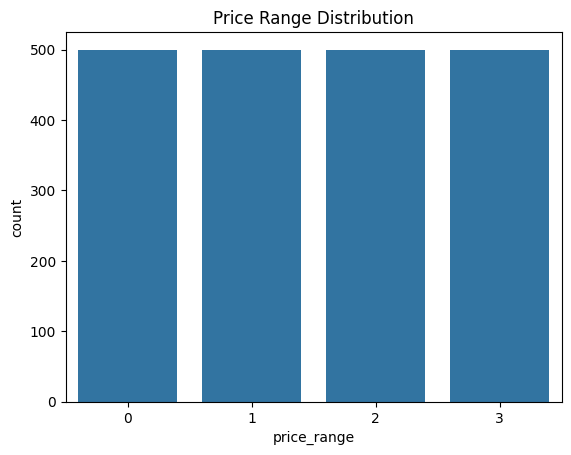

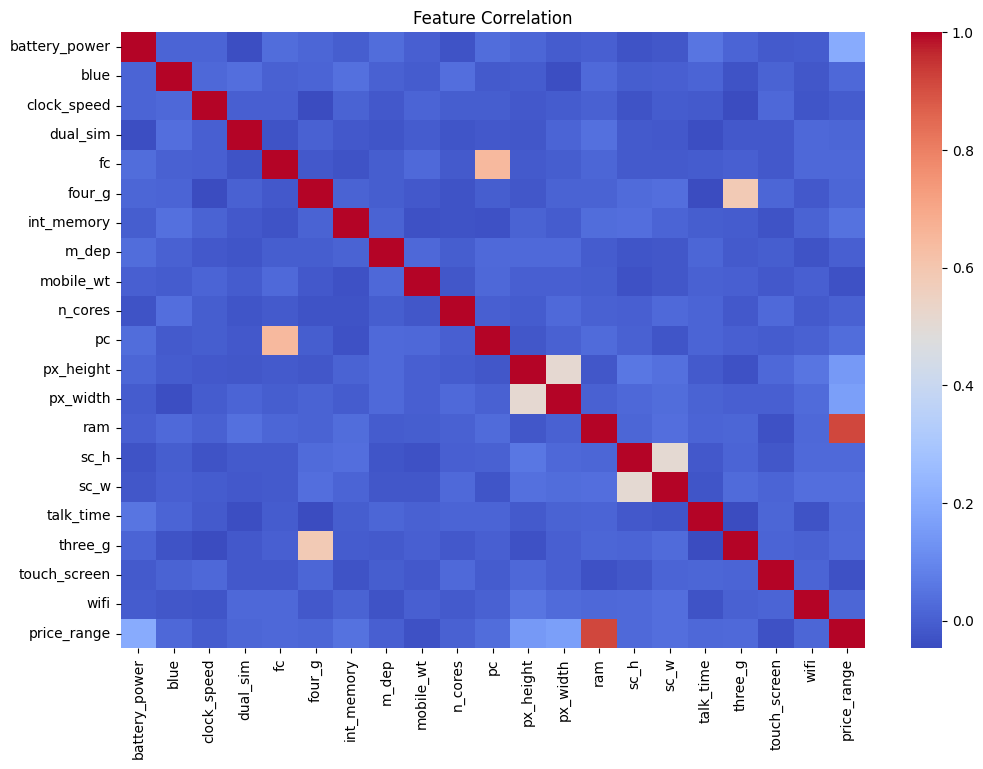

In [5]:
# 2. Exploratory Data Analysis (EDA)
# ----------------------
print("\n=== 2. Exploratory Data Analysis ===")

# Target variable distribution
sns.countplot(data=df, x='price_range')
plt.title('Price Range Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()


In [6]:
# 3. Train-Test Split
# ----------------------
X = df.drop('price_range', axis=1)
y = df['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
print("\n=== 3. Training models ===")

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    print(f"{name} - Accuracy: {acc:.4f}")
    print(classification_report(y_true, y_pred))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return acc

results = {}



=== 3. Training models ===



--- Logistic Regression Results ---
Logistic Regression - Accuracy: 0.9750
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       105
           1       0.94      1.00      0.97        91
           2       0.99      0.95      0.97        92
           3       0.97      0.99      0.98       112

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



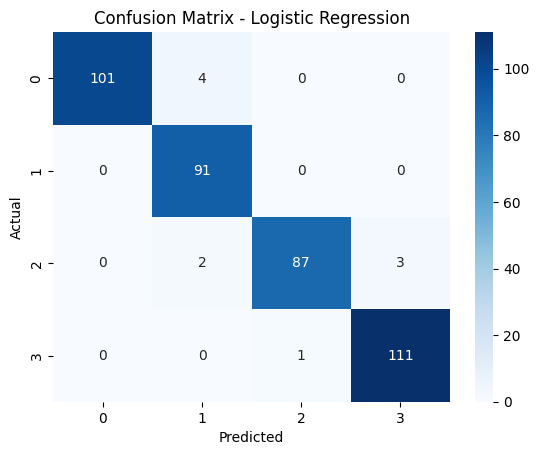


--- Decision Tree Results ---
Decision Tree - Accuracy: 0.8325
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       105
           1       0.75      0.84      0.79        91
           2       0.80      0.70      0.74        92
           3       0.86      0.90      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



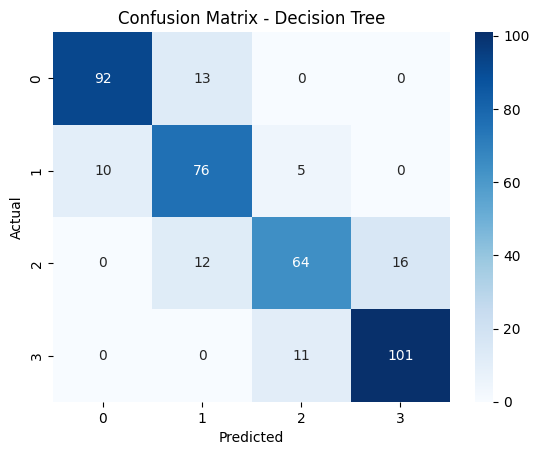


--- Random Forest Results ---
Random Forest - Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



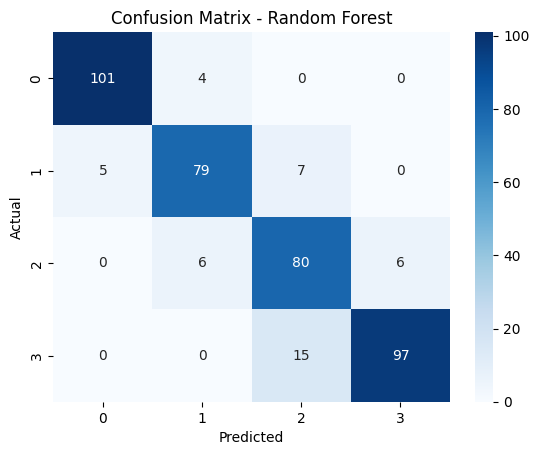

In [8]:
for name, model in models.items():
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(f"\n--- {name} Results ---")
    results[name] = evaluate_model(name, y_test, y_pred)


In [9]:
# 5. Hyperparameter Tuning (Random Forest)
# ----------------------
print("\n=== 4. Hyperparameter Tuning (Random Forest) ===")

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


=== 4. Hyperparameter Tuning (Random Forest) ===
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.8925
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400




=== 5. Model Comparison ===
                 Model  Accuracy
0  Logistic Regression    0.9750
1        Decision Tree    0.8325
2        Random Forest    0.8925

Comparison Table:
                Model  Accuracy
  Logistic Regression    0.9750
        Decision Tree    0.8325
        Random Forest    0.8925
Random Forest (Tuned)    0.8925


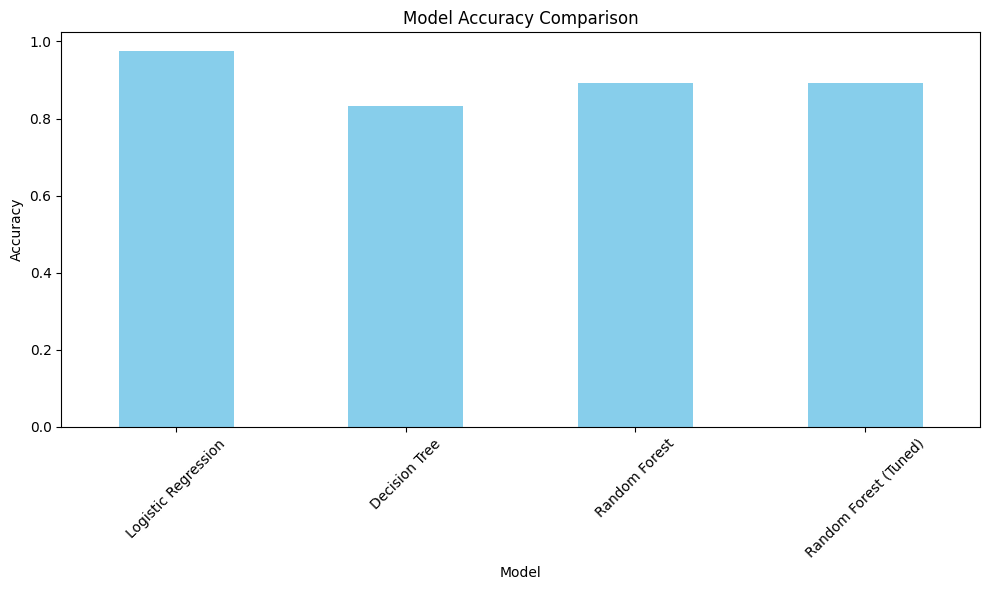

In [10]:
# 6. Compare All Models
# ----------------------
print("\n=== 5. Model Comparison ===")
comparison_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(comparison_df)

# Optional: Add tuned model
comparison_df.loc[len(comparison_df)] = ['Random Forest (Tuned)', accuracy_score(y_test, y_pred_best)]
print("\nComparison Table:")
print(comparison_df.to_string(index=False))

# Plot comparison
comparison_df.set_index('Model')['Accuracy'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()